In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from scipy import stats


In [ ]:
df= pd.read_csv('/content/Road Accident Data.csv')

In [ ]:
df.head(10)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
5,200901BS70006,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Slight,51.493415,Daylight,Kensington and Chelsea,None,...,3,2,Metropolitan Police,Dry,Single carriageway,30,11:48,Urban,Fine no high winds,Car
6,200901BS70007,1/8/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.480177,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,13:58,Urban,Fine no high winds,Motorcycle over 500cc
7,200901BS70008,1/2/2021,Friday,Auto traffic signal,Crossroads,Slight,51.491957,Daylight,Kensington and Chelsea,None,...,1,1,Metropolitan Police,Dry,Dual carriageway,30,13:18,Urban,Fine no high winds,Car
8,200901BS70009,1/7/2021,Wednesday,Give way or uncontrolled,T or staggered junction,Slight,51.496460,Daylight,Kensington and Chelsea,None,...,2,1,Metropolitan Police,Dry,Single carriageway,30,12:15,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under
9,200901BS70010,1/10/2021,Saturday,Auto traffic signal,Crossroads,Slight,51.481150,Daylight,Kensington and Chelsea,None,...,1,1,Metropolitan Police,Wet or damp,Single carriageway,30,9:52,Urban,Other,Car


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         307970 non-null  object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [ ]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


In [ ]:
# Drop Unbalanced columns
df.drop(columns='Carriageway_Hazards', inplace=True)

# Fill missing values with most frequent values
most_freq_surface_conditions = df['Road_Surface_Conditions'].mode()[0]
df['Road_Surface_Conditions'].fillna(most_freq_surface_conditions, inplace=True)

most_freq_road_type = df['Road_Type'].mode()[0]
df['Road_Type'].fillna(most_freq_road_type, inplace=True)

#replace vales in Accident_Severity columns
df['Accident_Severity'].replace('Fetal', 'Fatal', inplace=True)

#drop unwanted columns
df.drop(columns=['Latitude', 'Longitude','Junction_Control','Local_Authority_(District)','Police_Force'], inplace=True)

In [ ]:
# Mapping between Road Surface Conditions and corresponding Weather Conditions to fill the missing values
conditions_mapping = {
    'Dry': 'Fine no high winds',
    'Wet or damp': 'Raining no high winds',
    'Snow': 'Snowing no high winds',
    'Frost or ice': 'Snowing + high winds'
}

df['Weather_Conditions'].fillna(df['Road_Surface_Conditions'].map(conditions_mapping), inplace=True)
df['Weather_Conditions'].fillna('Other', inplace=True)

In [ ]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Detail',
       'Accident_Severity', 'Light_Conditions', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [ ]:
# Extract  only the daily hour of each accident
df['Time']= df['Time'].str.split(':').str[0]

# Convert 'Time' column to float
df['Time'] = df['Time'].astype(float)

# Calculate the mean of the 'Time' column
mean_time = df['Time'].mean().round(0)

# Fill missing values in the 'Time' column with the calculated mean
df['Time'].fillna(mean_time, inplace=True)

# Rename Columns name
df = df.rename(columns={'Accident_Severity': 'Accident_Injuries', 'Number_of_Casualties': 'death_toll' , 'Accident_Index': 'Accident_ID' , 'Time':'Hour_of_Accident'})

In [ ]:
# Creating a Pivot Table to analyze number of death values based on 'Accident Date' and 'Hour_of_Accident'
pivot_table = pd.pivot_table(df, values='death_toll', index=[ 'Accident Date'], columns='Hour_of_Accident', fill_value=None).round(0)
pivot_table

Hour_of_Accident,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Accident Date,,,,,,,,,,,,,,,,,,,,,
1/1/2021,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1/1/2022,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
1/10/2021,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1/10/2022,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
1/11/2021,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/7/2022,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0
9/8/2021,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0
9/8/2022,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [ ]:
category_mapping = {
    'Car': 'Car',
    'Taxi/Private hire car': 'Taxi',
    'Motorcycle over 500cc': 'Motorcycle',
    'Van / Goods 3.5 tonnes mgw or under': 'Van',
    'Goods over 3.5t. and under 7.5t': 'Other',
    'Motorcycle 125cc and under': 'Motorcycle',
    'Motorcycle 50cc and under': 'Motorcycle',
    'Bus or coach (17 or more pass seats)': 'Bus',
    'Goods 7.5 tonnes mgw and over': 'Other',
    'Other vehicle': 'Other',
    'Motorcycle over 125cc and up to 500cc': 'Motorcycle',
    'Agricultural vehicle': 'Other',
    'Minibus (8 - 16 passenger seats)': 'Other',
    'Pedal cycle': 'Pedal cycle',
    'Ridden horse': 'Ridden horse'
}

# Map values in 'Vehicle_Type' column to the specified categories
df['Vehicle_Type'] = df['Vehicle_Type'].map(category_mapping)

df['Vehicle_Type'].unique()

array(['Car', 'Taxi', 'Motorcycle', 'Van', 'Other', 'Bus', 'Pedal cycle',
       'Ridden horse'], dtype=object)

In [ ]:
vehicle_data = pd.read_csv('Vehicle Fuel Economy Estimates.csv')

<ipython-input-24-5ef255e7f11b>:1: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_data = pd.read_csv('Vehicle Fuel Economy Estimates.csv')


In [ ]:
print(vehicle_data.head())

   Vehicle ID  Year        Make               Model  \
0       26587  1984  Alfa Romeo           GT V6 2.5   
1       27705  1984  Alfa Romeo           GT V6 2.5   
2       26561  1984  Alfa Romeo  Spider Veloce 2000   
3       27681  1984  Alfa Romeo  Spider Veloce 2000   
4       27550  1984  AM General   DJ Po Vehicle 2WD   

                         Class          Drive       Transmission  \
0             Minicompact Cars            NaN     Manual 5-Speed   
1             Minicompact Cars            NaN     Manual 5-Speed   
2                  Two Seaters            NaN     Manual 5-Speed   
3                  Two Seaters            NaN     Manual 5-Speed   
4  Special Purpose Vehicle 2WD  2-Wheel Drive  Automatic 3-Speed   

  Transmission Descriptor  Engine Index Engine Descriptor  ...  \
0                     NaN          9001             (FFS)  ...   
1                     NaN          9005    (FFS) CA model  ...   
2                     NaN          9002             (FFS)  ...

In [ ]:
print(vehicle_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vehicle ID                           38113 non-null  int64  
 1   Year                                 38113 non-null  int64  
 2   Make                                 38113 non-null  object 
 3   Model                                38113 non-null  object 
 4   Class                                38113 non-null  object 
 5   Drive                                36924 non-null  object 
 6   Transmission                         38102 non-null  object 
 7   Transmission Descriptor              15045 non-null  object 
 8   Engine Index                         38113 non-null  int64  
 9   Engine Descriptor                    22693 non-null  object 
 10  Engine Cylinders                     37977 non-null  float64
 11  Engine Displacement         

In [ ]:

# Define the mapping between old and new categories
new_mapping = {
    'Minicompact Cars': 'Car',
    'Two Seaters': 'Car',
    'Special Purpose Vehicle 2WD': 'Other',
    'Special Purpose Vehicle 4WD': 'Other',
    'Subcompact Cars': 'Car',
    'Midsize Cars': 'Car',
    'Midsize Station Wagons': 'Van',
    'Compact Cars -': 'Car',
    'Midsize-Large Station Wagons': 'Van',
    'Large Cars': 'Car',
    'Small Station Wagons': 'Van',
    'Standard Pickup Trucks 2WD': 'Van',
    'Vans, Cargo Type': 'Van',
    'Standard Pickup Trucks 4WD': 'Van',
    'Special Purpose Vehicles': 'Other',
    'Small Pickup Trucks 2WD': 'Van',
    'Small Pickup Trucks 4WD': 'Van',
    'Vans': 'Van',
    'Standard Pickup Trucks -': 'Van',
    'Small Pickup Trucks': 'Van',
    'Vans Passenger': 'Van',
    'Standard Pickup Trucks/2wd': 'Van',
    'Special Purpose Vehicles/2wd': 'Other',
    'Special Purpose Vehicles/4wd': 'Other'
}

# Map the new categories to the corresponding old categories
vehicle_data['Class'] = vehicle_data['Class'].map(new_mapping)

# Display the unique mapped categories
print(vehicle_data['Class'].unique())

['Car' 'Other' 'Van' nan]


In [ ]:
vehicle_data.columns

Index(['Vehicle ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
       'Transmission Descriptor', 'Engine Index', 'Engine Descriptor',
       'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
       'Supercharger', 'Fuel Type', 'Fuel Type 1', 'Fuel Type 2',
       'City MPG (FT1)', 'Unrounded City MPG (FT1)', 'City MPG (FT2)',
       'Unrounded City MPG (FT2)', 'City Gasoline Consumption (CD)',
       'City Electricity Consumption', 'City Utility Factor',
       'Highway MPG (FT1)', 'Unrounded Highway MPG (FT1)', 'Highway MPG (FT2)',
       'Unrounded Highway MPG (FT2)', 'Highway Gasoline Consumption (CD)',
       'Highway Electricity Consumption', 'Highway Utility Factor',
       'Unadjusted City MPG (FT1)', 'Unadjusted Highway MPG (FT1)',
       'Unadjusted City MPG (FT2)', 'Unadjusted Highway MPG (FT2)',
       'Combined MPG (FT1)', 'Unrounded Combined MPG (FT1)',
       'Combined MPG (FT2)', 'Unrounded Combined MPG (FT2)',
       'Combined Electricity Consu

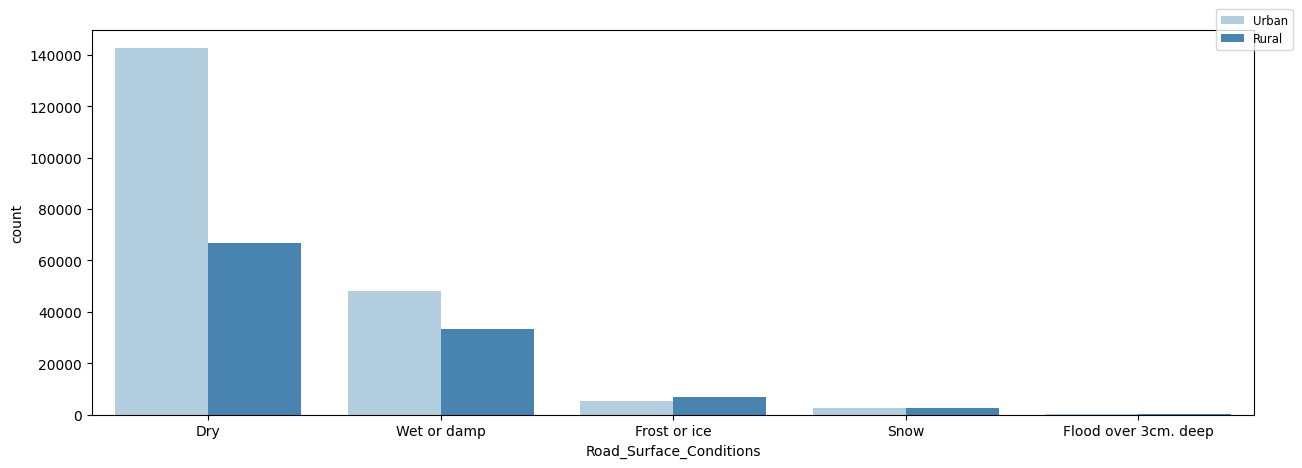

In [ ]:
# Create a figure with a specified size (width=15, height=5)
plt.figure(figsize=(15, 5))

# Create a count plot to visualize the distribution of accidents based on road surface conditions
sns.countplot(data=df, x='Road_Surface_Conditions', palette="Blues", hue='Urban_or_Rural_Area')

# Add a legend to the upper left corner outside the plot area
plt.legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')

Text(0, 0.5, ' ')

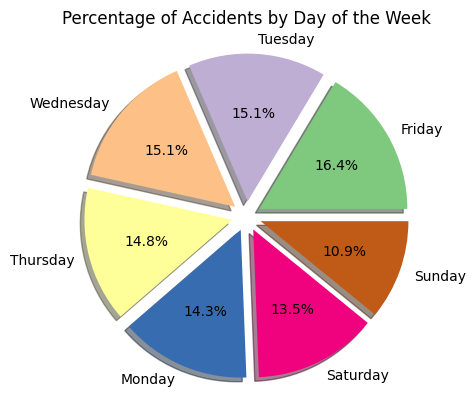

In [ ]:
#make a pie chart to display thee percentage of accident per each day
df['Day_of_Week'].value_counts().plot(kind='pie', autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], shadow=True, colors=sns.color_palette("Accent"))
plt.title('Percentage of Accidents by Day of the Week')
plt.ylabel(' ')

<ipython-input-32-e39506d8e5e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sorted, x='Hour_of_Accident',  palette="Accent")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0')])

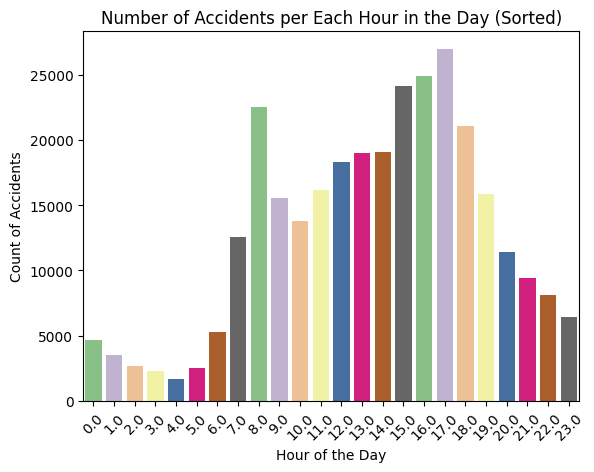

In [ ]:
# Create a Bar plot to display the number of accidents per each hour in the day
df_sorted = df.sort_values(by='Hour_of_Accident')
sns.countplot(data=df_sorted, x='Hour_of_Accident',  palette="Accent")
plt.title('Number of Accidents per Each Hour in the Day (Sorted)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Accidents')
plt.xticks(rotation =45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'T or staggered junction'),
  Text(1, 0, 'Crossroads'),
  Text(2, 0, 'Not at junction or within 20 metres'),
  Text(3, 0, 'Roundabout'),
  Text(4, 0, 'Mini-roundabout'),
  Text(5, 0, 'More than 4 arms (not roundabout)'),
  Text(6, 0, 'Private drive or entrance'),
  Text(7, 0, 'Slip road'),
  Text(8, 0, 'Other junction')])

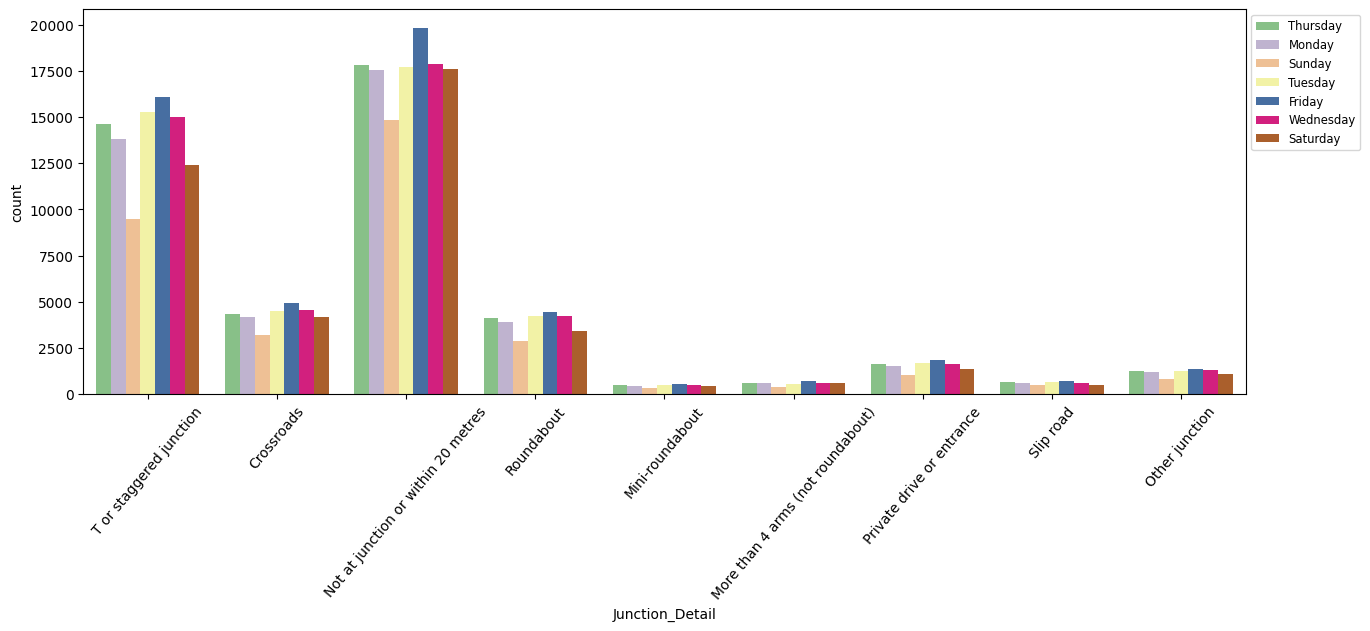

In [ ]:
# Count of accidents by junction details for each day of the week
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Junction_Detail', palette="Accent", hue='Day_of_Week')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.xticks(rotation=50)

In [ ]:
df.columns

Index(['Accident_ID', 'Accident Date', 'Day_of_Week', 'Junction_Detail',
       'Accident_Injuries', 'Light_Conditions', 'death_toll',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit', 'Hour_of_Accident', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

**FUEL TYPE ANALYSIS**

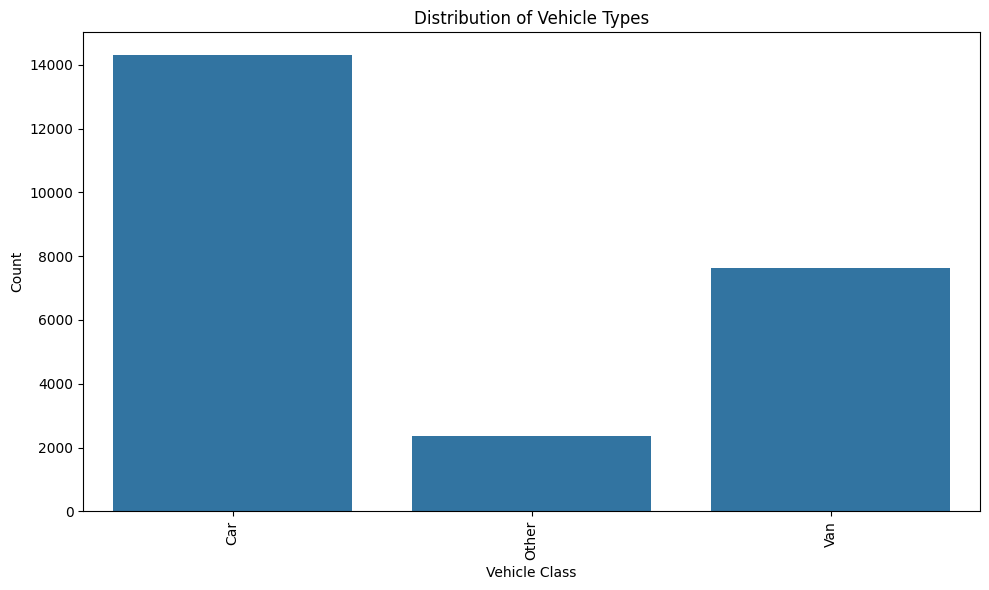

In [ ]:
# Analyze the distribution of vehicle types
plt.figure(figsize=(10, 6))
sns.countplot(data=vehicle_data, x='Class')
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels further for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

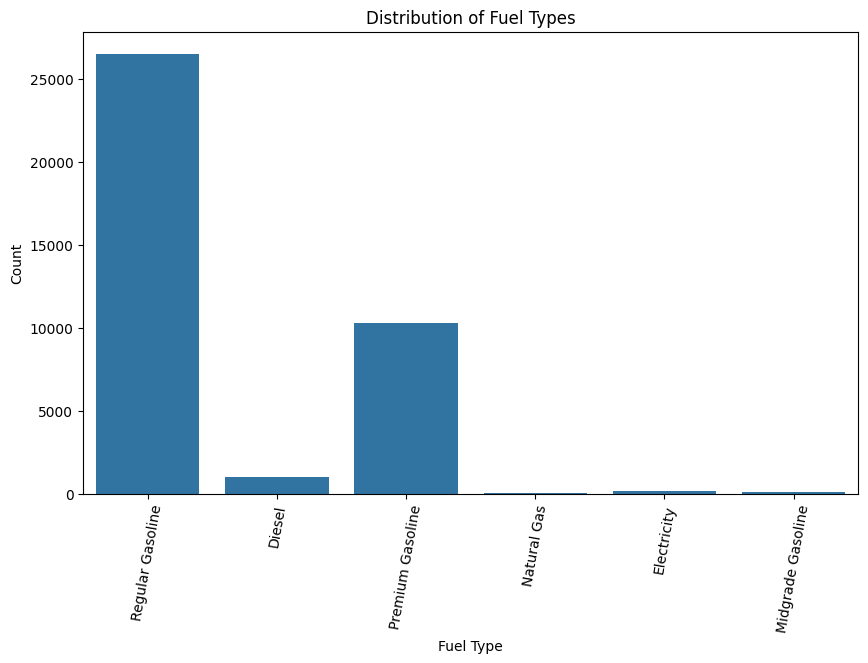

In [ ]:
# Analyze the distribution of fuel types
plt.figure(figsize=(10, 6))
sns.countplot(data=vehicle_data, x='Fuel Type 1')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

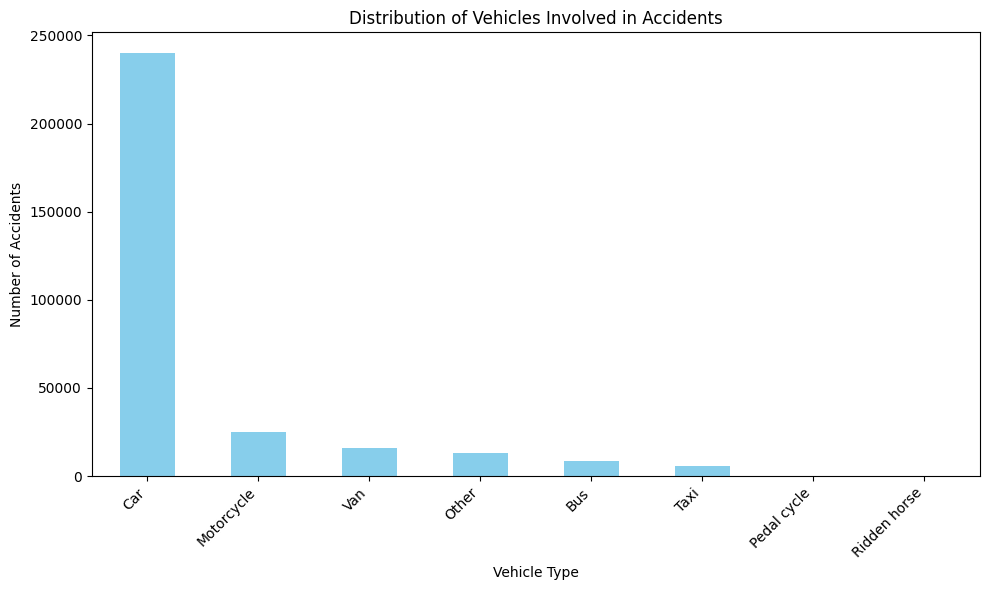

In [ ]:

# Analyze vehicle distribution in accidents
vehicle_distribution = df['Vehicle_Type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
vehicle_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Vehicles Involved in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

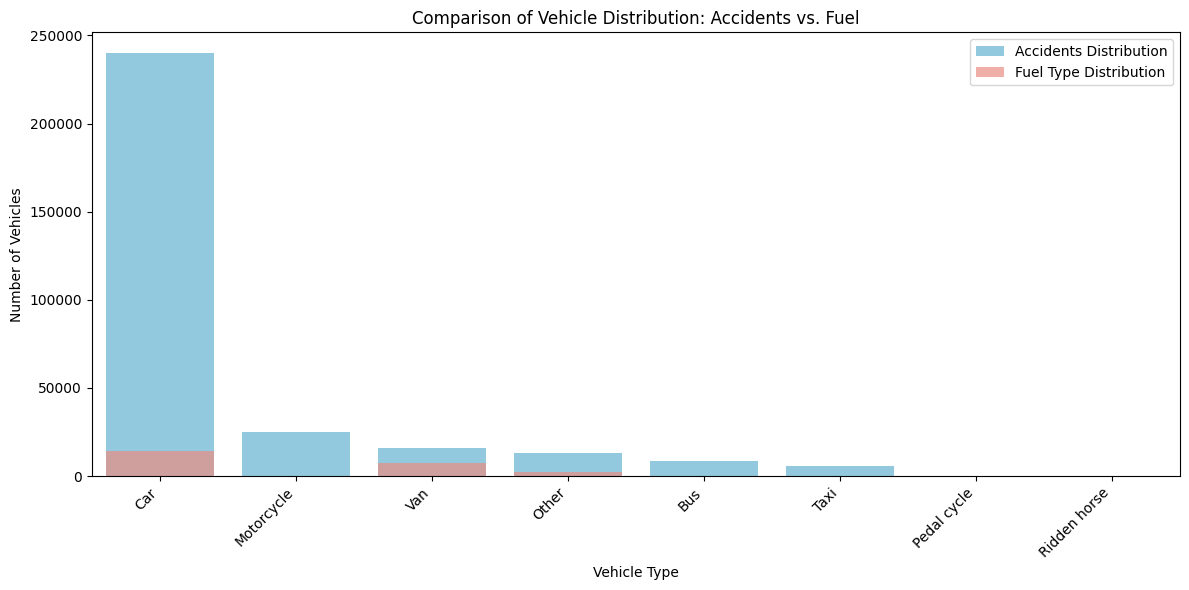

In [ ]:

# Analyze vehicle distribution in accidents
vehicle_distribution_accidents = df['Vehicle_Type'].value_counts()

# Analyze the distribution of vehicle types
vehicle_distribution_general = vehicle_data['Class'].value_counts()

# Set up the plot
plt.figure(figsize=(12, 6))

# Plotting
sns.barplot(x=vehicle_distribution_accidents.index, y=vehicle_distribution_accidents.values, color='skyblue', label='Accidents Distribution')
sns.barplot(x=vehicle_distribution_general.index, y=vehicle_distribution_general.values, color='salmon', alpha=0.7, label='Fuel Type Distribution')

# Add labels and title
plt.title('Comparison of Vehicle Distribution: Accidents vs. Fuel')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

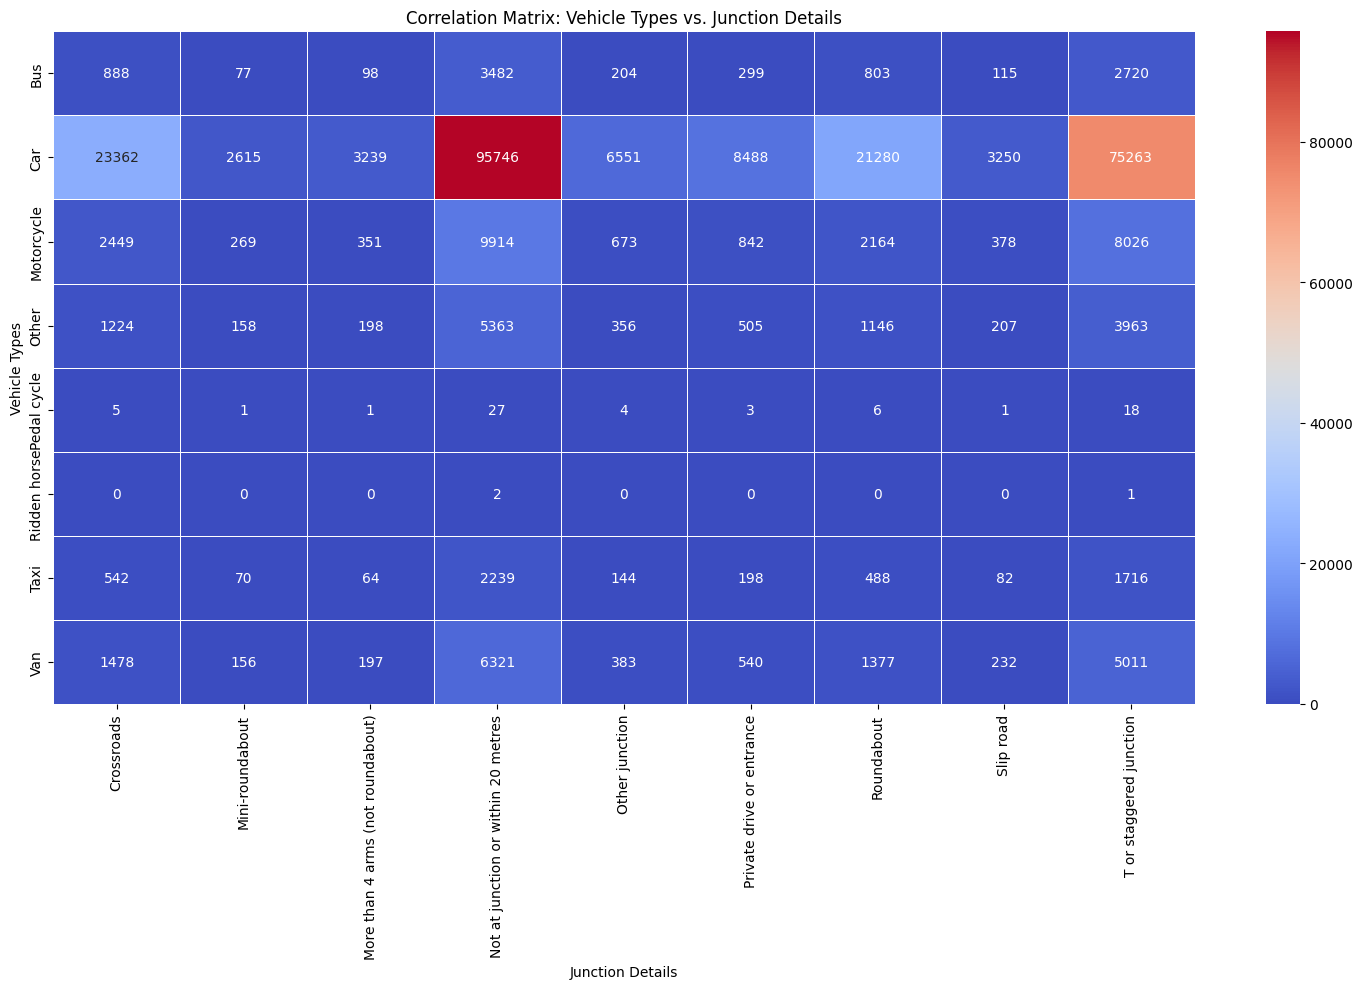

In [ ]:
# Count of accidents by vehicle type and junction details
vehicle_junction_counts = df.groupby(['Vehicle_Type', 'Junction_Detail']).size().unstack(fill_value=0)

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(vehicle_junction_counts, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Correlation Matrix: Vehicle Types vs. Junction Details')
plt.xlabel('Junction Details')
plt.ylabel('Vehicle Types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

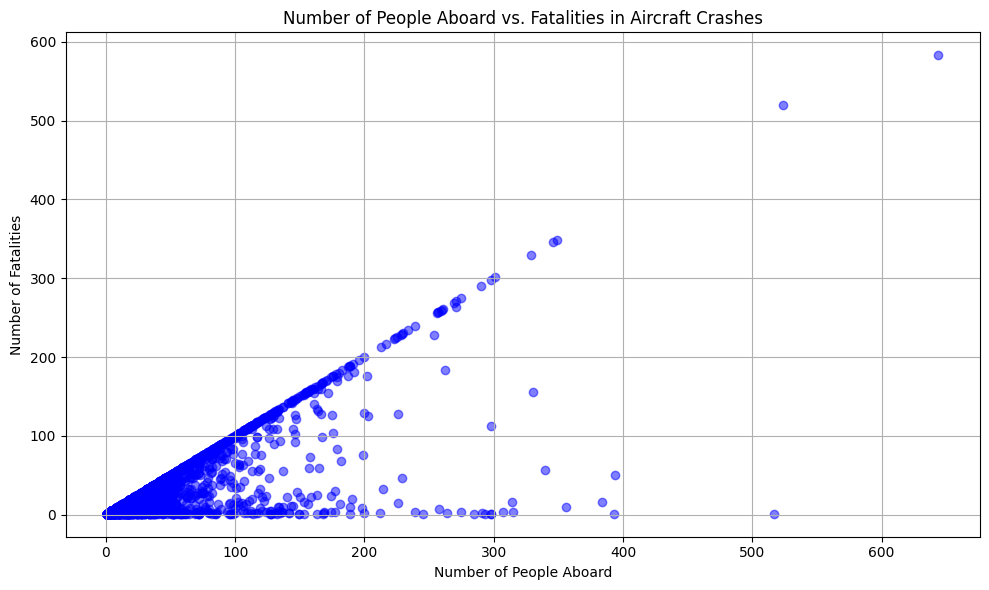

In [ ]:
airplane_data = pd.read_csv('Airplane_Crashes_and_Fatalities.csv', encoding='latin1')

# Drop rows with missing values in 'Aboard' or 'Fatalities' columns
airplane_data.dropna(subset=['Aboard', 'Fatalities'], inplace=True)

# Convert 'Aboard' and 'Fatalities' columns to numeric
airplane_data['Aboard'] = pd.to_numeric(airplane_data['Aboard'], errors='coerce')
airplane_data['Fatalities'] = pd.to_numeric(airplane_data['Fatalities'], errors='coerce')

# Filter out rows where 'Aboard' or 'Fatalities' are negative or zero
airplane_data = airplane_data[(airplane_data['Aboard'] > 0) & (airplane_data['Fatalities'] > 0)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(airplane_data['Aboard'], airplane_data['Fatalities'], color='blue', alpha=0.5)
plt.title('Number of People Aboard vs. Fatalities in Aircraft Crashes')
plt.xlabel('Number of People Aboard')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.tight_layout()
plt.show()